# Device Enumeration and Device Configuration

In [1]:
# these four imports will provide most of the functionality required in 
# to start working with basler cameras
# pypylon 
import pypylon.pylon as py
# plotting for graphs and display of image
import matplotlib.pyplot as plt
# linear algebra and basic math on image matrices
import numpy as np
# OpenCV for image processing functions
import cv2

In [2]:
# get instance of the pylon TransportLayerFactory
tlf = py.TlFactory.GetInstance()

In [3]:
# all pypylon objects are instances of SWIG wrappers around the underlying pylon c++ types
tlf

<pypylon.pylon.TlFactory; proxy of <Swig Object of type 'Pylon::CTlFactory *' at 0x00000205FFFE9F30> >

In [4]:
devices = tlf.EnumerateDevices()

In [5]:
# list of pylon Device 
devices

(<pypylon.pylon.DeviceInfo; proxy of <Swig Object of type 'Pylon::CDeviceInfo *' at 0x00000205C5B27990> >,
 <pypylon.pylon.DeviceInfo; proxy of <Swig Object of type 'Pylon::CDeviceInfo *' at 0x00000205C5B17030> >)

In [6]:
for d in devices:
    print(d.GetModelName(), d.GetSerialNumber())

acA1920-155uc 21656705
acA2500-20gc 21838888


In [7]:
# the active camera will be an InstantCamera based on a device
# created with the corresponding DeviceInfo
# this can be from a list of previously enumerated 
cam = py.InstantCamera(tlf.CreateDevice(devices[0]))

In [8]:
# or with the helper method to get the FirstDevice from an enumeration
cam = py.InstantCamera(tlf.CreateFirstDevice())

In [9]:
cam

<pypylon.pylon.InstantCamera; proxy of <Swig Object of type 'Pylon::CInstantCamera *' at 0x00000205FFFFE9C0> >

In [10]:
# the features of the device are only accessable after Opening the device
cam.Open()

# Features and their available attributes and functions

pylon / genicam features are of the types:

* Float
* Integer
* Bool
* Command
* String

If there are multiple instances of a features e.g. TriggerSource for each possible Trigger on a device e.g. FrameStart/LineStart/FrameBurst ....:
* Selectors are used to first select the instance e.g. FrameStart and then write to the feature


In [11]:
# Float
# the node
cam.Gain

<pypylon.genicam.IFloat; proxy of <Swig Object of type 'GENAPI_NAMESPACE::IFloat *' at 0x00000205FFFFE0C0> >

In [12]:
# Float 
# the value
cam.Gain.GetValue()

0.0

In [13]:
# abbrev get value
cam.Gain.Value

0.0

In [14]:
# set the value
cam.Gain.SetValue(12.1)

In [15]:
# abbrev set value
cam.Gain = 12.1

In [16]:
# the value has been updated
cam.Gain.Value

12.1

In [17]:
cam.Gain = 20

In [18]:
# Enumeration ... all values:
cam.TriggerSelector.Symbolics

('FrameBurstStart', 'FrameStart')

In [19]:
# set the value
cam.TriggerSelector = "FrameStart"

In [20]:
# selector handling:
# first set selector than the dependent value:
cam.TriggerSelector = "FrameStart"
cam.TriggerSource = "Line1"

In [21]:
# reset to power on defaults
cam.UserSetSelector = cam.UserSetDefault.Value
cam.UserSetLoad.Execute()

In [22]:
cam.PixelFormat.Symbolics

('Mono8', 'BayerRG8', 'BayerRG12', 'BayerRG12p', 'RGB8', 'BGR8', 'YCbCr422_8')

In [23]:
cam.PixelFormat = "RGB8"
# like above, alternative is the long form
cam.PixelFormat.SetValue("RGB8")

In [24]:
# grab one image with a timeout of 1s
# returns a GrabResult, which is the image plus metadata
res = cam.GrabOne(1000)

In [25]:
# the raw memory of the image
res.GetBuffer()[:100]

bytearray(b'\x8f\x9b\x9a\x8f\x9b\x9a\x8f\x9c\x9a\x8f\x9e\x98\x91\x9d\x99\x92\x9c\x99\x90\x9d\x98\x90\x9e\x99\x90\x9f\x99\x90\x9f\x9a\x95\x9e\x9a\x94\x9f\x9d\x93\x9f\x9d\x93\x9f\x9e\x92\xa0\x9d\x91\xa1\x9d\x91\xa1\x9e\x91\xa3\x97\x94\xa3\x97\x94\xa0\xa0\x97\xa1\xa0\x97\xa2\x9e\x93\xa5\x9c\x93\xa5\xa2\x95\xa4\xa3\x95\xa4\xa1\x96\xa3\xa2\x96\xa2\xa2\x96\xa3\xa1\x95\xa4\xa1\x99\xa5\xa0\x99\xa6\xa3\x94\xa8\xa2\x94')

# automatic conversion to ndarray with the Array call

In [26]:
# full method call
img = res.GetArray()
# abbrev
img = res.Array

In [27]:
img.shape

(1200, 1712, 3)

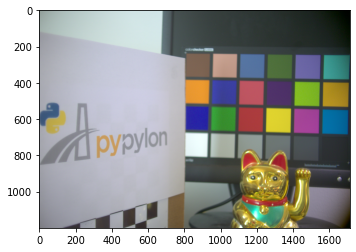

In [28]:
plt.imshow(img)

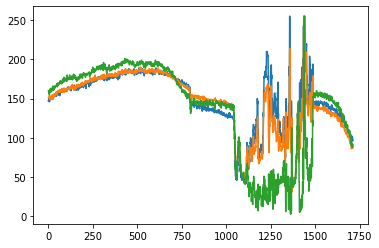

In [29]:
plt.plot(img[1000,:])

In [30]:
cam.Close()